# Machine Learning - Classification
## Willingness to change job
I completed the following project as part of the Machine Learning 1 course at the University of Warsaw. All students in class were given the same dataset. With various machine learning methods our task was to build the best performing model.

The task was to predict whether someone is willing to change jobs based on several categorical and numerical features. (Binary Classification)

The models were evaluated partially by balanced accuracy score, therefore my model was also optimized for this metric. Moreover, I had to use my trained model to predict on an unlabelled dataset. 

The combination of these two played a role in the final grade.

The balanced accuracy of my model on the validation set is 0.7580. When it comes to prediction on the unlabelled dataset, I topped my class on a tie with 2 other students and received maximum points. 

In [208]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import missingno as msno



import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [209]:
df = pd.read_csv('job_change_train.csv')

In [210]:
df.head()

,id,gender,age,education,field_of_studies,is_studying,county,relative_wage,years_since_job_change,years_of_experience,hours_of_training,is_certified,size_of_company,type_of_company,willing_to_change_job
0,1,Male,22,higher_BSc,science,no,county_118,162.84,1,2,18,1,<10,private_company,No
1,2,Male,27,higher_BSc,science,no,county_028,151.34,1,6,24,1,50-99,private_company,No
2,3,Male,38,higher_BSc,science,no,county_031,114.17,1,13,96,1,50-99,startup_with_funding,No
3,4,Unknown,47,higher_BSc,science,no,county_080,123.55,>4,>20,36,1,100-500,private_company,No
4,5,Male,28,higher_BSc,science,no,county_118,162.84,1,5,106,1,1000-4999,private_company,No


In [211]:
df.dtypes

id                          int64
gender                     object
age                         int64
education                  object
field_of_studies           object
is_studying                object
county                     object
relative_wage             float64
years_since_job_change     object
years_of_experience        object
hours_of_training           int64
is_certified                int64
size_of_company            object
type_of_company            object
willing_to_change_job      object
dtype: object

In [212]:
for col in df.describe().columns:
    print('Column Name: ',col)
    print(df[col].unique())
    print('_'*80 )

Column Name:  id
[    1     2     3 ... 12425 12426 12427]
________________________________________________________________________________
Column Name:  age
[22 27 38 47 28 25 32 23 24 26 42 48 35 34 30 50 39 29 49 36 40 33 21 46
 44 20 31 45 37 43 41]
________________________________________________________________________________
Column Name:  relative_wage
[162.84 151.34 114.17 123.55 110.45 163.55 158.06 134.87 146.91 163.9
 133.46 161.07 142.31 147.97 157.53 157.   131.51 166.2  122.31 135.58
 128.32 158.59 141.95  97.35 130.98 161.96 155.41 102.48 140.54 129.21
 158.77 156.47 130.63  93.28 159.12 120.71 161.6  137.35 149.92  98.77
 146.38 149.21 117.88 163.72 135.76 139.65 121.95 163.37 148.68 158.42
 158.95 145.85 135.05 140.89  98.24 130.8  167.97 159.83 127.79  99.65
 150.1  153.28 128.68 113.28  91.69 153.1  131.86  91.33 151.51 135.23
 163.02 120.36  79.3   98.41 124.08  84.78  87.26 136.11 131.33 130.1
 137.18 140.72 114.87 139.48 114.52 142.84 138.06  86.2  138.24 122.66


In [213]:
for i in df.columns:
    unique_values = df[i].value_counts()
    print(unique_values)
    print('_'*80)

id
1        1
8301     1
8279     1
8280     1
8281     1
        ..
4146     1
4147     1
4148     1
4149     1
12427    1
Name: count, Length: 12427, dtype: int64
________________________________________________________________________________
gender
Male       8515
Unknown    2963
Female      826
Other       123
Name: count, dtype: int64
________________________________________________________________________________
age
27    849
26    787
28    759
29    722
25    710
24    632
30    618
31    566
32    519
23    456
33    439
34    421
47    373
35    373
46    367
45    365
36    363
48    353
49    344
38    323
22    319
39    289
37    281
44    230
40    211
21    197
50    188
41    149
42     87
20     78
43     59
Name: count, dtype: int64
________________________________________________________________________________
education
higher_BSc        7528
higher_MSc        2831
secondary         1320
no_information     295
Phd                257
primary            196
Name: c

Feature engineering

In [214]:
df = df.drop(columns=['id'])
df['county'] = df['county'].str.replace('county_', '').str.lstrip('0')
df['county'] = df['county'].astype('int64')

In [215]:
def convert_experience(value):
    if value == '>20':
        return 21
    elif value == '<1':
        return 0
    elif value == 'unknown':
        return None
    else:
        return int(value)

df['years_of_experience'] = df['years_of_experience'].apply(convert_experience)

df['years_of_experience'] = df['years_of_experience'].fillna('unknown')


bins = [0, 4, 7, 11, 15, 19, 22]
labels = ['0-4', '5-7', '8-11', '12-15', '16-19', '20+']

# Bin the values, excluding 'unknown'
df['experience_bins'] = pd.cut(df[df['years_of_experience'] != 'unknown']['years_of_experience'],
                                  bins=bins, labels=labels, right=False)

# Fill 'unknown' for the 'experience_bins' where 'years_of_experience' is 'unknown'
df['experience_bins'] = df['experience_bins'].astype(object)
df.loc[df['years_of_experience'] == 'unknown', 'experience_bins'] = 'unknown'

In [216]:
df = df.drop(columns=['years_of_experience'])

In [217]:
df['willing_to_change_job'] = df['willing_to_change_job'].map({'No': 0, 'Yes': 1})

Checking how big portions of certain variables are unknown and how they are distributed amongts our target variable to see if I should drop the missing values or try to use the lack of information as information.

In [218]:
df[df['experience_bins'] == 'unknown'].groupby(['willing_to_change_job']).count()['gender']

willing_to_change_job
0    26
1    14
Name: gender, dtype: int64

In [219]:
df[df['size_of_company'] == 'unknown'].groupby(['willing_to_change_job']).count()['gender']

willing_to_change_job
0    2299
1    1551
Name: gender, dtype: int64

In [220]:
df[df['field_of_studies'] == 'no_information'].groupby(['willing_to_change_job']).count()['gender']

willing_to_change_job
0    1486
1     349
Name: gender, dtype: int64

In [221]:
df[df['is_studying'] == 'no_information'].groupby(['willing_to_change_job']).count()['gender']

willing_to_change_job
0    179
1     80
Name: gender, dtype: int64

I am not going to drop the missing information, instead I would later convert it into as a separate category of each categorical variable.

In [222]:
df['field_of_studies'] = df['field_of_studies'].replace('no_information', 'unknown')
df['education'] = df['education'].replace('no_information', 'unknown')
df['is_studying'] = df['is_studying'].replace('no_information', 'unknown')
df['type_of_company'] = df['type_of_company'].replace('no_information', 'unknown')

In [223]:
def plot_cat_features(df, target, features):
    
    f, axes = plt.subplots(len(features), 2, figsize=(14, 5 * len(features)))
    f.suptitle('Categorical Features vs Target Feature', fontsize=15)
    plt.tight_layout(pad=4)

    for i, feature in enumerate(features):
        cross_tab_prop = pd.crosstab(index=df[feature], columns=df[target], normalize='index')

        colors_prop = plt.cm.tab20c(range(0, 256, int(256 / len(cross_tab_prop.columns))))

        cross_tab_prop.plot(
            kind='bar', ax=axes[i, 0], stacked=True, width=0.8,
            legend=True, ylabel='Proportion', sharey=True, alpha=0.8,
            color=colors_prop
        )

        for p in axes[i, 0].patches:
            height = p.get_height()
            if height > 0:
                axes[i, 0].annotate(
                    f'{height * 100:.1f}%',
                    (p.get_x() + p.get_width() / 2., p.get_y() + height / 2.),
                    ha='center', va='center', fontsize=9, color='black', xytext=(0, 0),
                    textcoords='offset points'
                )

        axes[i, 0].set_xlabel('')
        axes[i, 0].legend(title=target, bbox_to_anchor=(1.05, 1), loc='upper left')
        axes[i, 0].set_title(f'{feature} (Proportion)', fontsize=10, y=1.05)

        df_count = df.groupby([feature, target]).size().unstack().fillna(0)
        df_count.plot(
            kind='bar', stacked=True, alpha=0.8,
            ax=axes[i, 1], ylabel="Count",
            colormap='Accent', edgecolor='black'
        )

        for p in axes[i, 1].patches:
            height = p.get_height()
            if height > 0:
                axes[i, 1].annotate(
                    f'{int(height)}',
                    (p.get_x() + p.get_width() / 2., p.get_y() + height / 2.),
                    ha='center', va='center', fontsize=9, color='black', xytext=(0, 0),
                    textcoords='offset points'
                )

        axes[i, 1].set_xlabel('')
        axes[i, 1].set_title(f'{feature} (Count)', fontsize=10, y=1.05)

    plt.show()


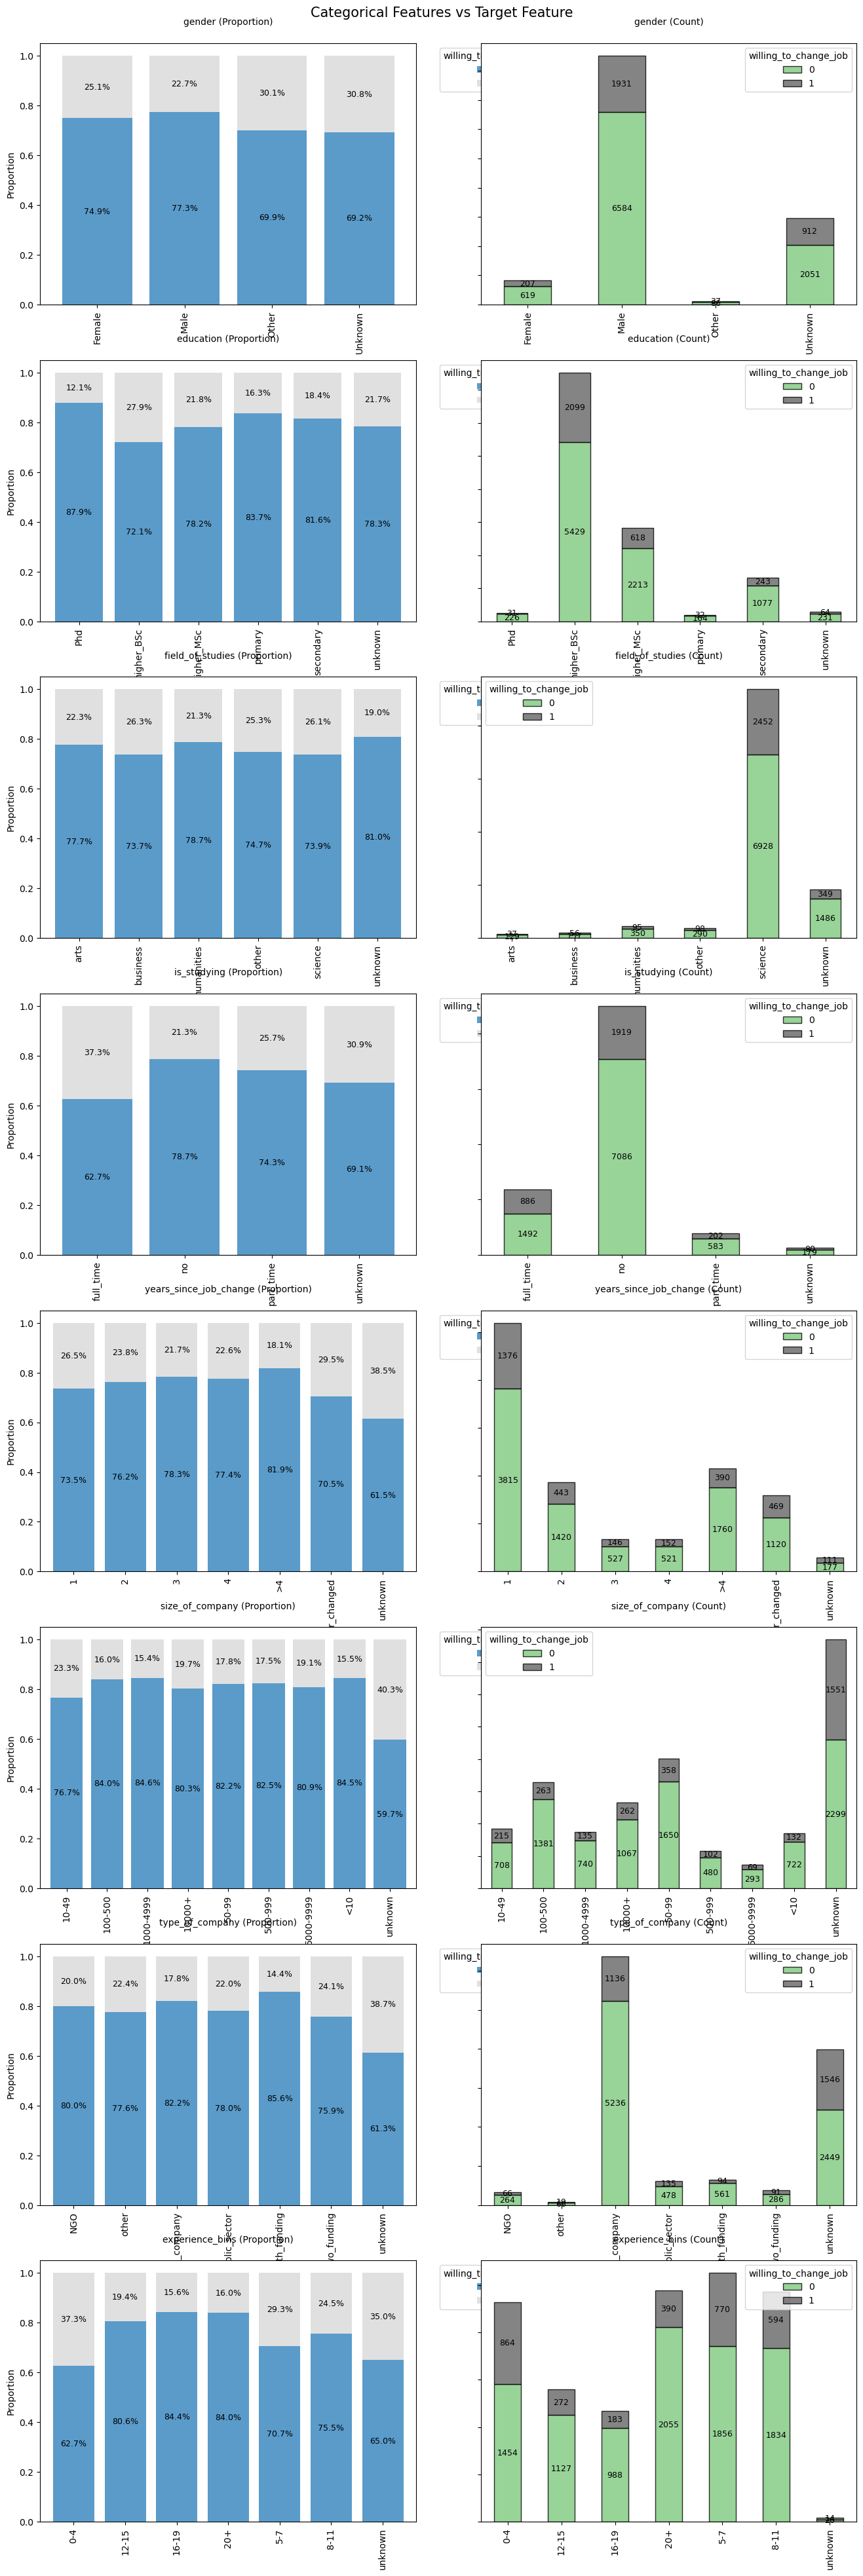

In [224]:
target_feature = 'willing_to_change_job'

categorical_features = df.select_dtypes(include=['object']).columns.tolist()
categorical_features = [f for f in categorical_features if f != target_feature]


plot_cat_features(df, target_feature, categorical_features)

['age', 'county', 'relative_wage', 'hours_of_training', 'is_certified']


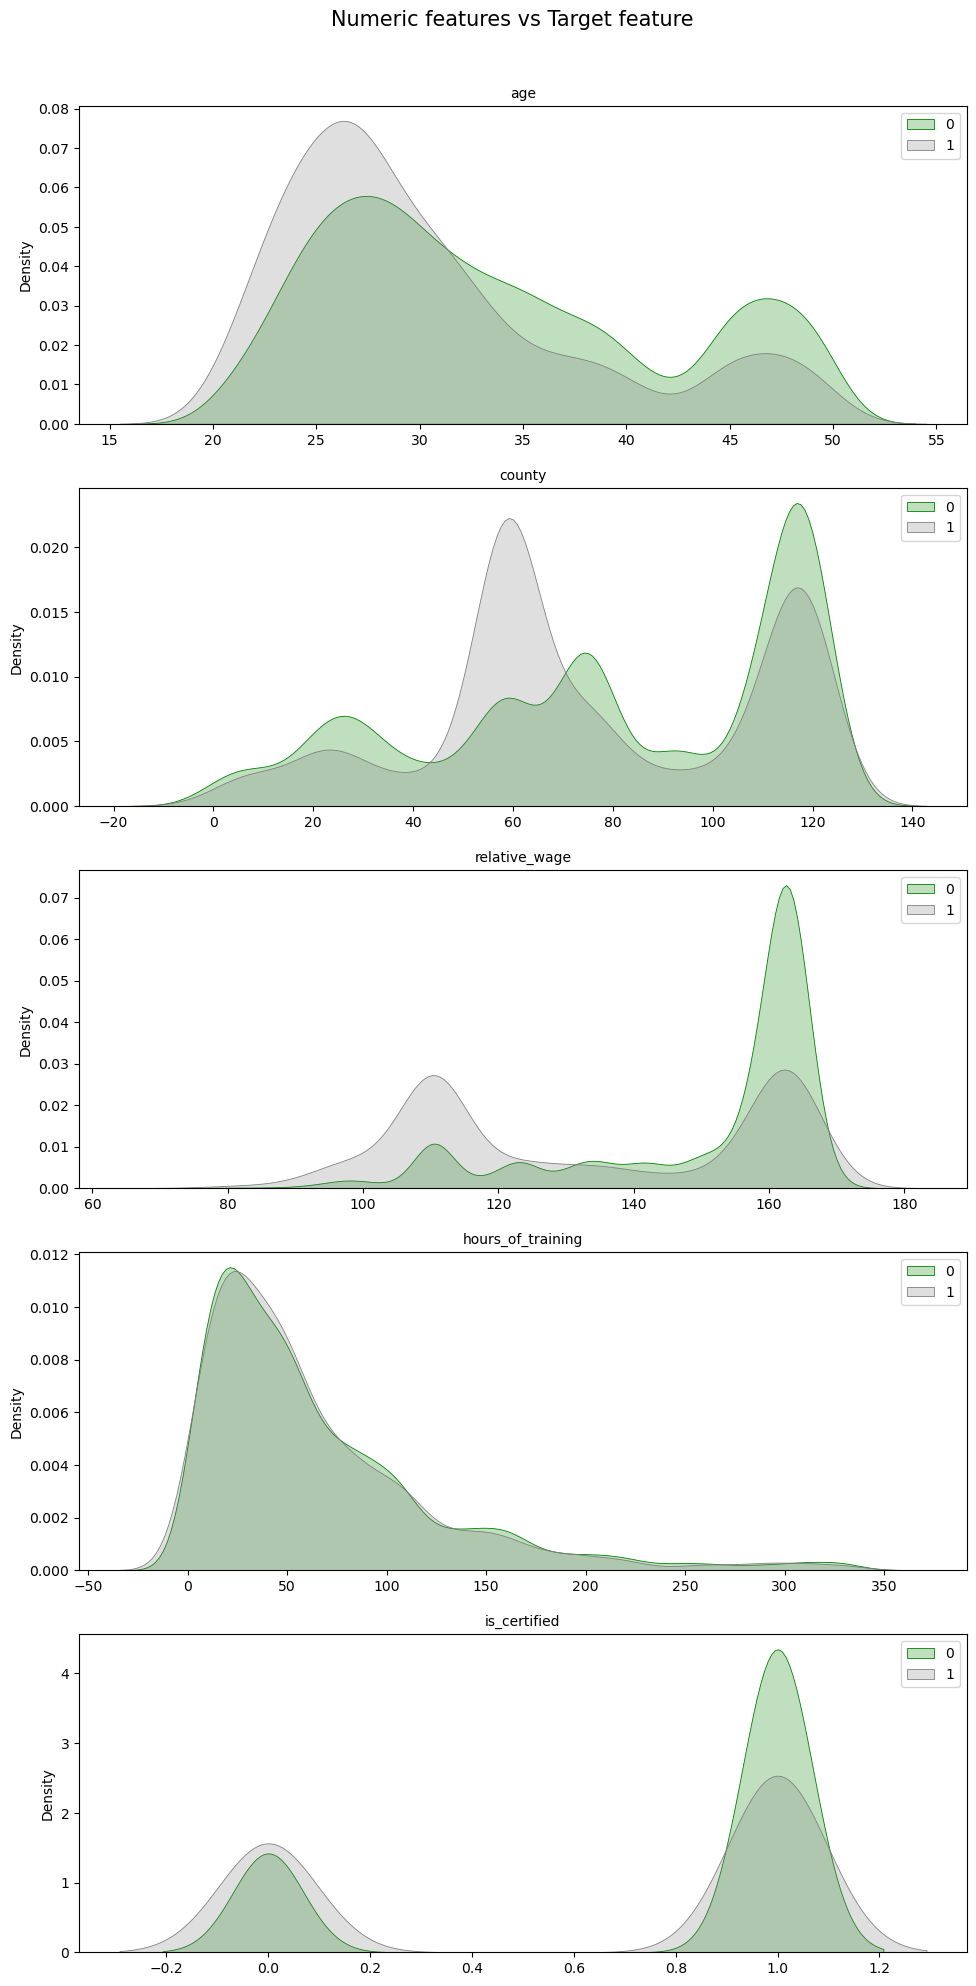

In [225]:
num_features = df.select_dtypes(include=['number']).columns.tolist()
num_features = [f for f in num_features if f != target_feature]
plot_numeric(df, target_feature, num_features)


print(num_features)

Seems like relative_wage can be really influencial when it comes to the willingness to switch jobs, people with higher salaries are less likely to change.

In [226]:
def plot_numeric(df, target, features):

    f, axes = plt.subplots(len(features),1)
    f.suptitle('Numeric features vs Target feature',fontsize=15,y=1.0005)
    f.set_figheight(4*len(features))
    f.set_figwidth(10)
    f.tight_layout(pad=2.5)

    for i, feature in enumerate(features):

        sns.kdeplot(
            data = df.loc[df[target] == 0], 
            x = feature, 
            fill = True, 
            color ="green",
            linewidth=0.6, 
            ax=axes[i], 
            label=0
        )
            
        sns.kdeplot(
            data = df.loc[df[target] == 1], 
            x = feature, 
            fill = True, 
            color ="grey",
            linewidth=0.6, 
            ax=axes[i], 
            label=1
        )

        axes[i].set_xlabel('')
        axes[i].legend()
        axes[i].set_title(feature,fontsize=10, y=1.00)




,Count,Proportion
willing_to_change_job,,
0,9340,0.7516
1,3087,0.2484


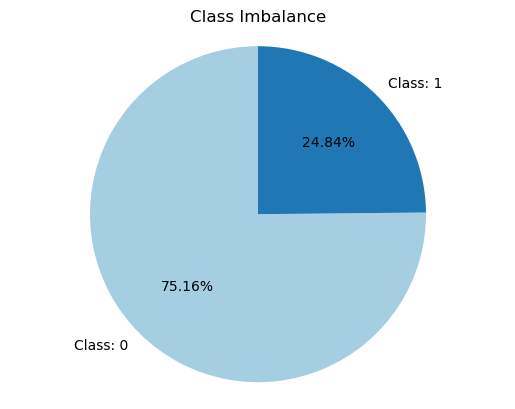

In [227]:
value_count = df['willing_to_change_job'].value_counts()
ratio = value_count / len(df)

class_balance_df = pd.DataFrame({
    'Count': value_count, 
    'Proportion': np.round(proportions,4)
})
display(class_balance_df)

fig, ax = plt.subplots()
ax.pie(
    class_balance_df['Proportion'], 
    labels=[f'Class: {name}' for name in value_counts.index], 
    autopct=lambda p: f'{p:.2f}%', 
    startangle=90,
    colors=plt.cm.Paired.colors
)
plt.title('Class Imbalance')
plt.axis('equal')
plt.show()

In [228]:
list_of_describes = []
for feat in num_features:
    grouped_df = df.groupby('willing_to_change_job')[feat].describe().round(0)
    arrays = [
        [feat,feat],
        grouped_df.index.to_list(),
    ]
    tuples = list(zip(*arrays))
    grouped_df.index = pd.MultiIndex.from_tuples(tuples, names=["feature", "willing_to_change_job"])
    list_of_describes.append(grouped_df)

pd.concat(list_of_describes, axis=0)

count   mean   std   min    25%  \
feature           willing_to_change_job                                     
age               0                      9340.0   34.0   8.0  20.0   27.0   
                  1                      3087.0   31.0   8.0  20.0   25.0   
county            0                      9340.0   80.0  36.0   1.0   58.0   
                  1                      3087.0   75.0  33.0   1.0   59.0   
relative_wage     0                      9340.0  151.0  19.0  79.0  142.0   
                  1                      3087.0  133.0  25.0  79.0  110.0   
hours_of_training 0                      9340.0   66.0  61.0   1.0   23.0   
                  1                      3087.0   63.0  59.0   1.0   23.0   
is_certified      0                      9340.0    1.0   0.0   0.0    1.0   
                  1                      3087.0    1.0   0.0   0.0    0.0   

                                           50%    75%    max  
feature           willing_to_change_job                       
age               0                       32.0   39.0   50.0  
                  1                       28.0   34.0   50.0  
county            0                       75.0  118.0  123.0  
                  1                       59.0  112.0  123.0  
relative_wage     0                      161.0  163.0  168.0  
                  1                      129.0  163.0  168.0  
hours_of_training 0                       47.0   89.0  336.0  
                  1                       46.0   84.0  336.0  
is_certified      0                        1.0    1.0    1.0  
                  1                        1.0    1.0    1.0

In [230]:
df = pd.get_dummies(df)

In [231]:
y = df['willing_to_change_job']

In [232]:
from sklearn.model_selection import train_test_split
temp, test = train_test_split(df, test_size = 0.2, random_state = 42,
                                      stratify=df['willing_to_change_job'])

train, val = train_test_split(temp, test_size = 0.125, random_state = 42,
                                      stratify=temp['willing_to_change_job'])

train = train.reset_index(drop = True)
val = val.reset_index(drop = True)
test = test.reset_index(drop = True)

print(train.shape, val.shape, test.shape)
print(round((100*train.shape[0]/df.shape[0]), 2),
      round((100*val.shape[0]/df.shape[0]), 2),
      round((100*test.shape[0]/df.shape[0]), 2))

(8698, 56) (1243, 56) (2486, 56)
69.99 10.0 20.0


In [233]:
X_train, y_train = train.drop(columns = 'willing_to_change_job'), train['willing_to_change_job']
X_val, y_val = val.drop(columns = 'willing_to_change_job'), val['willing_to_change_job']
X_test, y_test = test.drop(columns = 'willing_to_change_job'), test['willing_to_change_job']

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(8698, 55) (8698,)
(1243, 55) (1243,)
(2486, 55) (2486,)


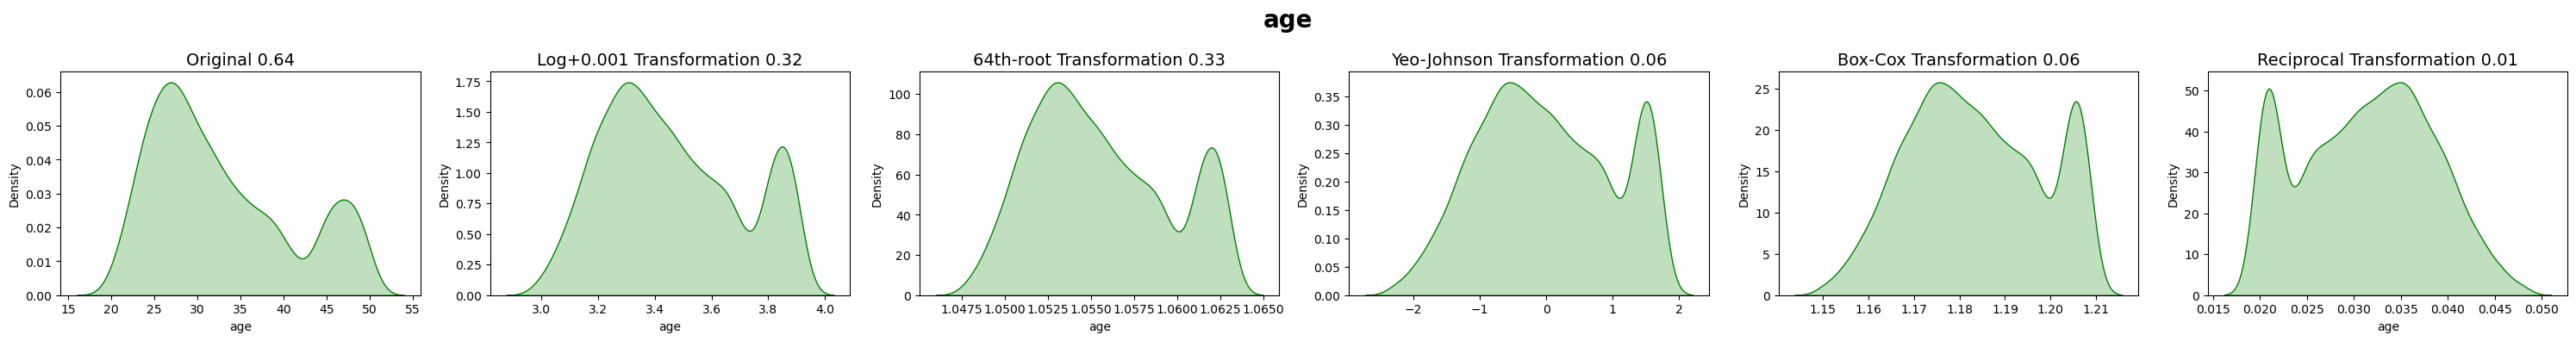

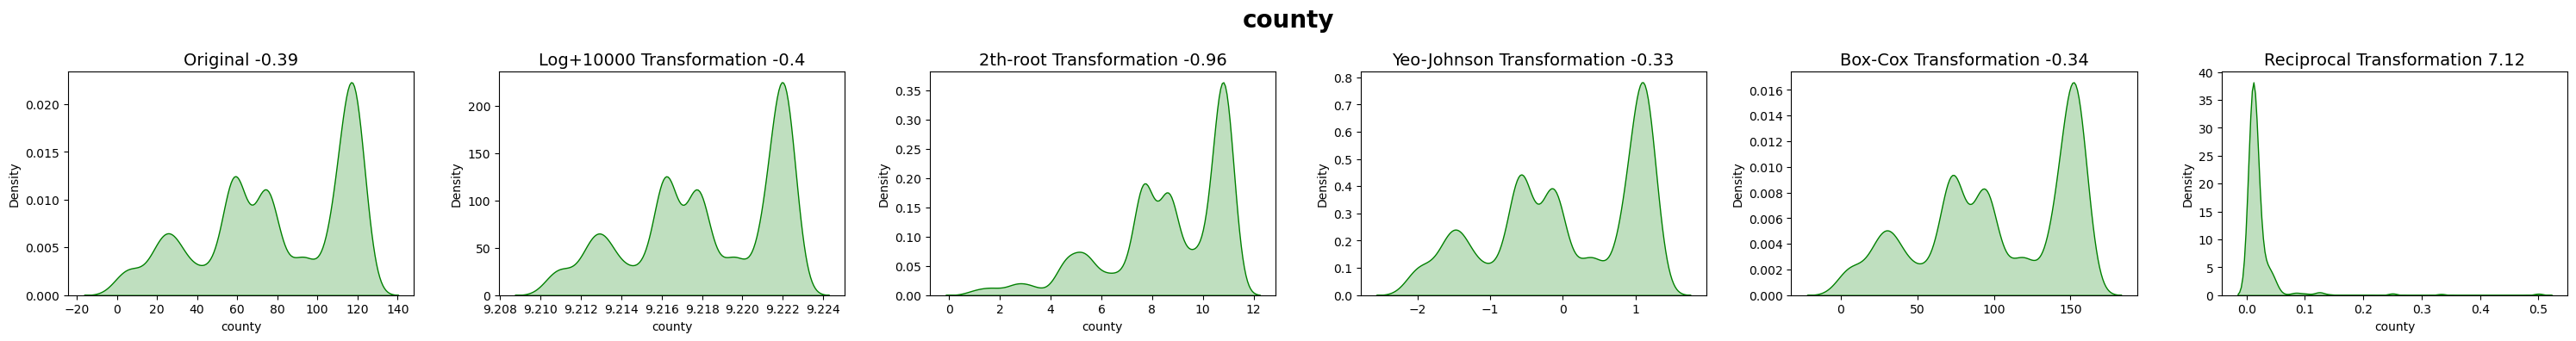

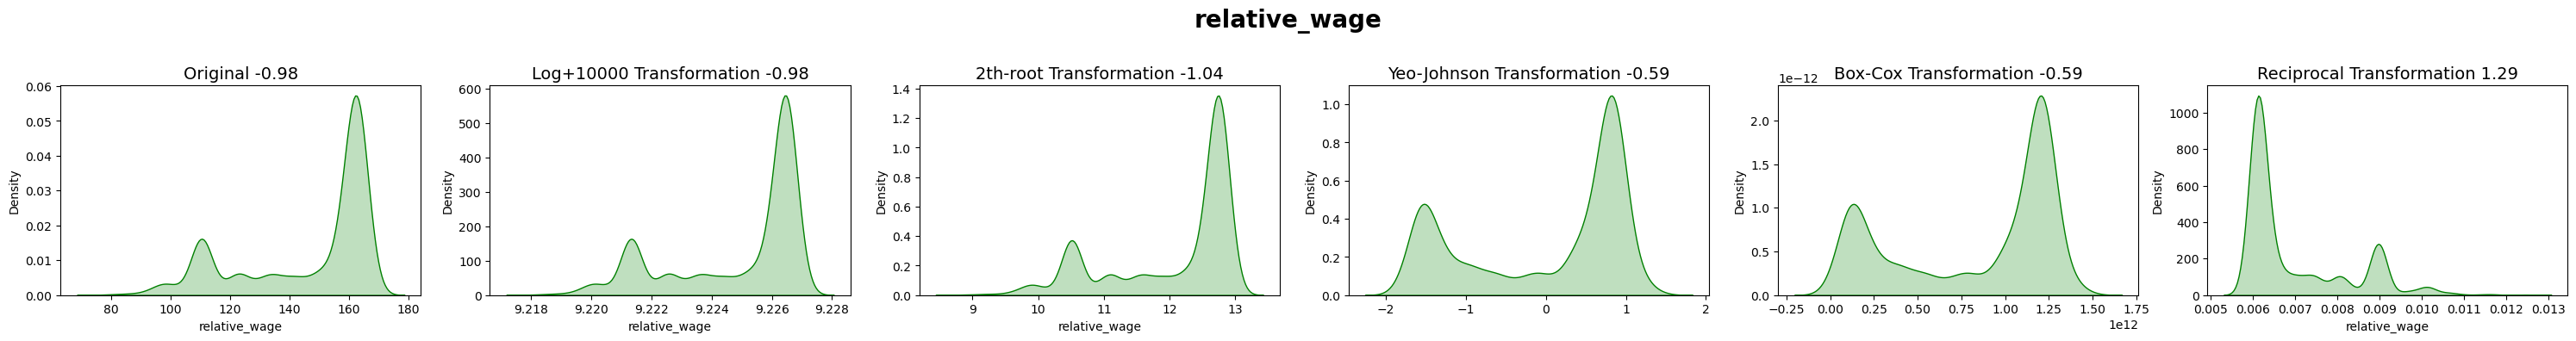

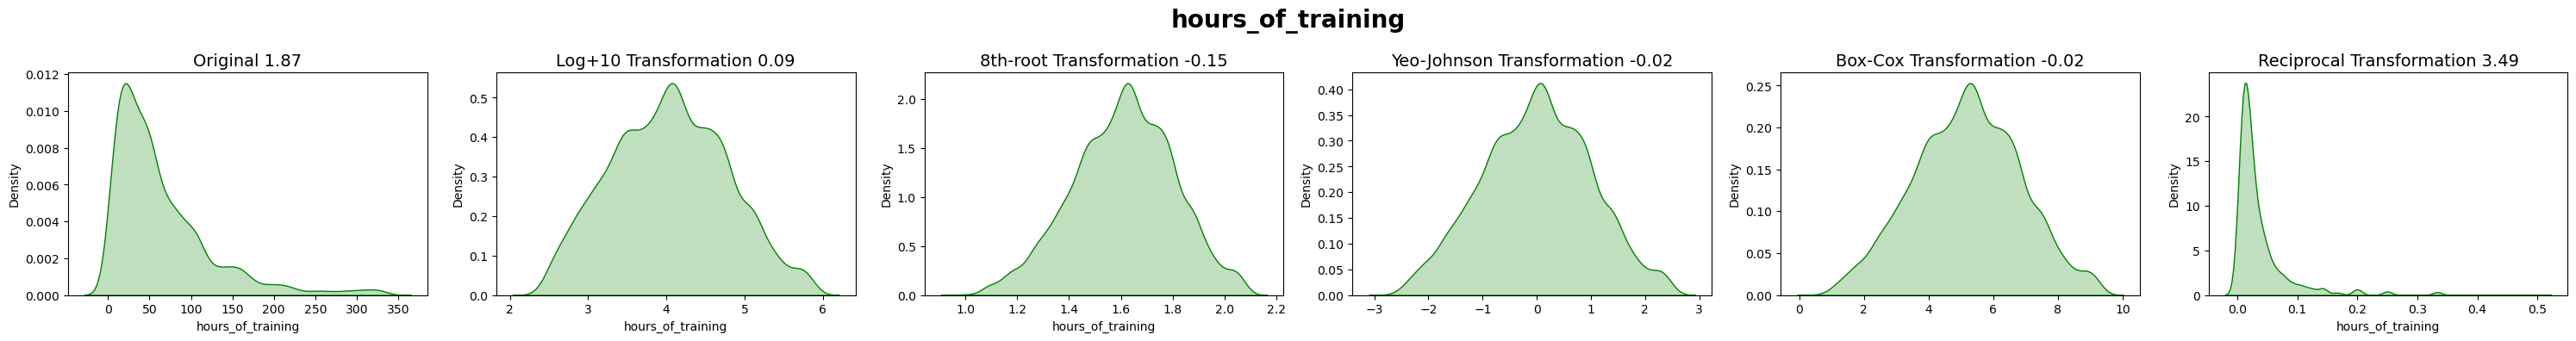

In [234]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
from scipy.stats import skew, boxcox

num_features_continous = [x for x in num_features if x != 'is_certified']

for attr in num_features_continous:
    fig, ax = plt.subplots(1, 6, figsize=(30, 4))

    skf = X_train[attr].skew().round(2)
    sns.kdeplot(X_train[attr], fill=True, ax=ax[0])
    ax[0].set_title(f'Original {skf}', fontsize=14)

    # Log transformation
    gridsv, x, skf = [0.001, 1, 10, 100, 1000, 10000], 0.001, 200
    for i in gridsv:
        n_skf = skew(np.log(i + X_train[attr]))
        if abs(n_skf) < abs(skf):
            x, skf = i, n_skf

    log_trans = np.log(x + X_train[attr])
    skf = round(skew(log_trans), 2)
    sns.kdeplot(log_trans, fill=True, ax=ax[1])
    ax[1].set_title(f'Log+{x} Transformation {skf}', fontsize=14)

    # Root transformation
    gridsv, x, skf = [1/2, 1/4, 1/8, 1/16, 1/32, 1/64], 1/2, 200
    for i in gridsv:
        n_skf = skew(np.power(X_train[attr], i))
        if abs(n_skf) < abs(skf):
            x, skf = i, n_skf

    root_trans = np.power(X_train[attr], x)
    skf = round(skew(root_trans), 2)
    sns.kdeplot(root_trans, fill=True, ax=ax[2])
    ax[2].set_title(f'{int(1/x)}th-root Transformation {skf}', fontsize=14)

    # Yeo-Johnson transformation
    transformer = PowerTransformer(method='yeo-johnson')
    yeo_trans = transformer.fit_transform(X_train[[attr]] + 1)[:, 0]
    skf = round(skew(yeo_trans), 2)
    sns.kdeplot(yeo_trans, fill=True, ax=ax[3])
    ax[3].set_title(f'Yeo-Johnson Transformation {skf}', fontsize=14)

    # Box-Cox transformation
    positive_data = X_train[attr][X_train[attr] > 0] + 1  # Box-Cox requires positive values
    boxcox_trans, _ = boxcox(positive_data)
    skf = round(skew(boxcox_trans), 2)
    sns.kdeplot(boxcox_trans, fill=True, ax=ax[4])
    ax[4].set_title(f'Box-Cox Transformation {skf}', fontsize=14)

    # Reciprocal transformation
    reciprocal_trans = 1 / (X_train[attr] + 1)
    skf = round(skew(reciprocal_trans), 2)
    sns.kdeplot(reciprocal_trans, fill=True, ax=ax[5])
    ax[5].set_title(f'Reciprocal Transformation {skf}', fontsize=14)

    plt.suptitle(attr, fontsize=20, weight='bold')
    plt.tight_layout(pad=1.1)
    plt.show()


Using yeo-johnson transformation on all the numeric variables to make them less skewed.

In [236]:
from sklearn.preprocessing import PowerTransformer

yeo_johnson = PowerTransformer(method='yeo-johnson')

X_train[['age', 'relative_wage', 'hours_of_training', 'is_certified']] = yeo_johnson.fit_transform(X_train[['age', 'relative_wage', 'hours_of_training', 'is_certified']])
X_test[['age', 'relative_wage', 'hours_of_training', 'is_certified']] = yeo_johnson.transform(X_test[['age', 'relative_wage', 'hours_of_training', 'is_certified']])
X_val[['age', 'relative_wage', 'hours_of_training', 'is_certified']] = yeo_johnson.transform(X_val[['age', 'relative_wage', 'hours_of_training', 'is_certified']])

#### End of EDA and Data Pre Processing

## Training the models, selecting the best one and tuning its hyperparameters 

In [238]:
#Running some baseline models without hyperparameter tuning
##trying old models from old file

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC
from catboost import CatBoostClassifier
from xgboost.sklearn import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier


classifiers = {
    
    'KNN': KNeighborsClassifier(n_neighbors=3),
    'LogisticRegression':LogisticRegression(random_state = 42, max_iter=1000),
    'SGDClassifier':SGDClassifier(random_state = 42),
    'LinearSVC':LinearSVC(random_state = 42, max_iter = 10000),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state = 42),
    'ExtraTreeClassifier': ExtraTreeClassifier(random_state = 42),
    'GradientBoostingClassifier':GradientBoostingClassifier(random_state = 42),
    'RandomForestClassifier': RandomForestClassifier(random_state = 42),
    'ExtraTreesClassifier': ExtraTreesClassifier(random_state = 42),
    'CatBoostClassifier':CatBoostClassifier(random_state = 42, verbose=False),
    'LGBMClassifier':LGBMClassifier(random_state = 42, verbose=0),
    'AdaBoostClassifier': AdaBoostClassifier(algorithm="SAMME", random_state=42),
    'MLPClassifier': MLPClassifier(alpha=1, max_iter=1000, random_state=42),


}

In [239]:
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score, roc_auc_score, balanced_accuracy_score

val_scores = dict()
train_scores = dict()

for clr in classifiers.keys():
    print(f'{clr}:')
    classifiers[clr].fit(X_train, y_train)
    y_train_pred = classifiers[clr].predict(X_train)
    train_score = {
        'recall' : recall_score(y_train, y_train_pred, zero_division=0),
        'precision' : precision_score(y_train, y_train_pred, zero_division=0),
        'accuracy' : accuracy_score(y_train, y_train_pred),
        'balanced_accuracy': balanced_accuracy_score(y_train, y_train_pred),  # Add balanced accuracy
        'f1_score' : f1_score(y_train, y_train_pred, zero_division=0),
        'auc_score': roc_auc_score(y_train, y_train_pred),
    }
    train_scores[clr] = train_score

    y_val_pred = classifiers[clr].predict(X_val)
    val_score = {
        'recall' : recall_score(y_val, y_val_pred, zero_division=0),
        'precision' : precision_score(y_val, y_val_pred, zero_division=0),
        'accuracy' : accuracy_score(y_val, y_val_pred),
        'balanced_accuracy': balanced_accuracy_score(y_val, y_val_pred),  # Add balanced accuracy
        'f1_score' : f1_score(y_val, y_val_pred, zero_division=0),
        'auc_score': roc_auc_score(y_val, y_val_pred),
    }
    val_scores[clr] = val_score
    print(f'f1 score train: {train_score["f1_score"]:.3f}, validation: {val_score["f1_score"]:.3f}')
    print(f'Balanced accuracy train: {train_score["balanced_accuracy"]:.3f}, validation: {val_score["balanced_accuracy"]:.3f}')
    print('-'*50)


KNN:
f1 score train: 0.702, validation: 0.486
Balanced accuracy train: 0.794, validation: 0.658
--------------------------------------------------
LogisticRegression:
f1 score train: 0.365, validation: 0.339
Balanced accuracy train: 0.602, validation: 0.590
--------------------------------------------------
SGDClassifier:
f1 score train: 0.577, validation: 0.574
Balanced accuracy train: 0.737, validation: 0.734
--------------------------------------------------
LinearSVC:


/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


f1 score train: 0.104, validation: 0.089
Balanced accuracy train: 0.523, validation: 0.517
--------------------------------------------------
DecisionTreeClassifier:
f1 score train: 0.999, validation: 0.439
Balanced accuracy train: 0.999, validation: 0.625
--------------------------------------------------
ExtraTreeClassifier:
f1 score train: 0.999, validation: 0.421
Balanced accuracy train: 0.999, validation: 0.613
--------------------------------------------------
GradientBoostingClassifier:
f1 score train: 0.604, validation: 0.573
Balanced accuracy train: 0.733, validation: 0.714
--------------------------------------------------
RandomForestClassifier:
f1 score train: 0.999, validation: 0.483
Balanced accuracy train: 0.999, validation: 0.657
--------------------------------------------------
ExtraTreesClassifier:
f1 score train: 0.999, validation: 0.447
Balanced accuracy train: 0.999, validation: 0.637
--------------------------------------------------
CatBoostClassifier:
f1 score 

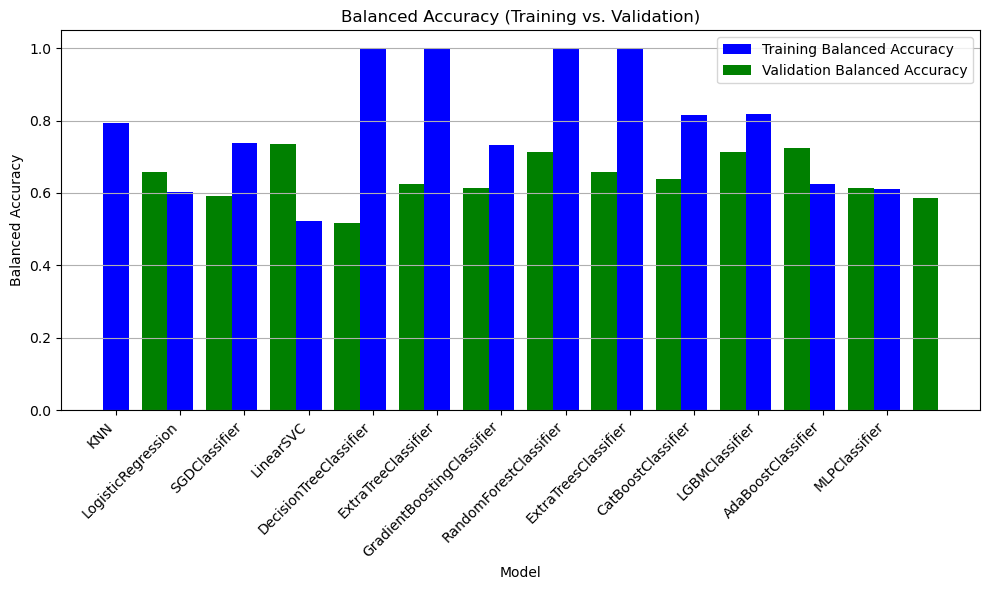

In [240]:
import matplotlib.pyplot as plt

# Extract data from dictionaries
models = list(train_scores.keys())
train_balanced_acc = [score['balanced_accuracy'] for score in train_scores.values()]
val_balanced_acc = [score['balanced_accuracy'] for score in val_scores.values()]

# Define colors for each set
colors = ['blue', 'green']  # Adjust colors as desired

# Create the bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as desired
bar_width = 0.4
plt.bar(models, train_balanced_acc, label='Training Balanced Accuracy', width=bar_width, color=colors[0], align='center')
plt.bar([pos + bar_width for pos in range(len(models))], val_balanced_acc, label='Validation Balanced Accuracy', width=bar_width, color=colors[1], align='edge')
plt.xlabel('Model')
plt.ylabel('Balanced Accuracy')
plt.title('Balanced Accuracy (Training vs. Validation)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(axis='y')
plt.tight_layout()

# Display the plot
plt.show()



After running the baseline models for a quick comparison, I tried to optimize several different models. For the sake of demonstration, I only include the final, best performing model based on balanced accuracy and the way I tuned its hyperparameters.

Since the best performing model was Random Forest, in this case there was no need to perform feature selection.

In the pipeline:
- I included SMOTE to handle the class imbalance.
- Standard scaler to further normalize feature values
- Random Forest Classifier as my selected model

To cross validate my model, I used Stratified K fold to handle class imbalance.
For hyperparameters tuning, I decided to use Randomized Search.

In [241]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import balanced_accuracy_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

def optimize_fit_rf(X_train, y_train):
    class_weights = {1: np.sqrt(y_train.value_counts()[0] / y_train.value_counts()[1])}
    param_dist = {
        'classifier__max_depth': [80, 90, 100, 110, None],
        'classifier__max_features': [2, 3, 4, 5, 6, 'sqrt'],
        'classifier__min_samples_leaf': [1, 2, 3, 4, 5],
        'classifier__min_samples_split': [2, 5, 8, 10, 12],
        'classifier__n_estimators': [100, 200, 300, 400, 500, 600],
        'classifier__class_weight': [class_weights, 'balanced']
    }

    pipeline = Pipeline([
        ('smote', SMOTE(random_state=42)),
        ('scaler', StandardScaler()),
        ('classifier', RandomForestClassifier(n_jobs=-1, random_state=42))
    ])

    kfold = StratifiedKFold(n_splits=5)

    model = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=param_dist,
        n_iter=50,
        cv=kfold,
        scoring='balanced_accuracy',
        verbose=1,
        n_jobs=-1,
        random_state=42,
        error_score='raise'
    )

    model.fit(X_train, y_train)
    return model

try:
    model_rf = optimize_fit_rf(X_train, y_train)

    y_pred_test = model_rf.predict(X_test)
    y_prob_test = model_rf.predict_proba(X_test)[:, 1]

    accuracy_test = accuracy_score(y_test, y_pred_test)
    balanced_acc_test = balanced_accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test)
    recall_test = recall_score(y_test, y_pred_test)
    f1_test = f1_score(y_test, y_pred_test)
    roc_auc_test = roc_auc_score(y_test, y_prob_test)

    print(f'Test Accuracy: {accuracy_test:.4f}')
    print(f'Test Balanced Accuracy: {balanced_acc_test:.4f}')
    print(f'Test Precision: {precision_test:.4f}')
    print(f'Test Recall: {recall_test:.4f}')
    print(f'Test F1 Score: {f1_test:.4f}')
    print(f'Test ROC AUC Score: {roc_auc_test:.4f}')

    y_pred_val = model_rf.predict(X_val)
    y_prob_val = model_rf.predict_proba(X_val)[:, 1]

    accuracy_val = accuracy_score(y_val, y_pred_val)
    balanced_acc_val = balanced_accuracy_score(y_val, y_pred_val)
    precision_val = precision_score(y_val, y_pred_val)
    recall_val = recall_score(y_val, y_pred_val)
    f1_val = f1_score(y_val, y_pred_val)
    roc_auc_val = roc_auc_score(y_val, y_prob_val)

    print(f'Validation Accuracy: {accuracy_val:.4f}')
    print(f'Validation Balanced Accuracy: {balanced_acc_val:.4f}')
    print(f'Validation Precision: {precision_val:.4f}')
    print(f'Validation Recall: {recall_val:.4f}')
    print(f'Validation F1 Score: {f1_val:.4f}')
    print(f'Validation ROC AUC Score: {roc_auc_val:.4f}')

except Exception as e:
    print(f'Error: {e}')

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Test Accuracy: 0.7856
Test Balanced Accuracy: 0.7512
Test Precision: 0.5560
Test Recall: 0.6828
Test F1 Score: 0.6129
Test ROC AUC Score: 0.7923
Validation Accuracy: 0.7812
Validation Balanced Accuracy: 0.7580
Validation Precision: 0.5459
Validation Recall: 0.7120
Validation F1 Score: 0.6180
Validation ROC AUC Score: 0.7908


In [242]:
best_model = model_rf.best_estimator_

In [243]:
import joblib

joblib_file = "trained_rf.pkl"
joblib.dump(best_model, joblib_file)

['trained_rf.pkl']